# $(\mu, \lambda)$ Evolution Strategy development

## AMHE

In [1]:
import nn_training.optimizers as optim
import nn_training.experiment_objectives as object_fun

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)

%load_ext autoreload
%autoreload 2

In [2]:
dataset = np.arange(-4, 4, 0.1)

optimizer = optim.MuLambdaEvolutionStrategy(
    mu_value=25,
    lambda_value=100,
    optimized_func=object_fun.polynomial_func,    # in current experiment f(x) = x ** 2
    dataset=dataset,
)

In [3]:
best_nn, alg_trace = optimizer.optimize(
    experiment_name="test",
    in_channels=1,
    n_hidden_neurons=10,
    out_channels=1,
    mutation_tau=0.5,
    mutation_tau_prime=0.5946,
    n_iters=500,
    best_loss_treshold=1e-10,
)

Epoch 0 loss => 9.6762
Epoch 1 loss => 6.6958
Epoch 2 loss => 3.2897
Epoch 3 loss => 3.8627
Epoch 4 loss => 5.4041
Epoch 5 loss => 3.2270
Epoch 6 loss => 7.9299
Epoch 7 loss => 3.9692
Epoch 8 loss => 2.7260
Epoch 9 loss => 4.2432
Epoch 10 loss => 3.8126
Epoch 11 loss => 4.8952
Epoch 12 loss => 2.1465
Epoch 13 loss => 3.4071
Epoch 14 loss => 3.0361
Epoch 15 loss => 2.9389
Epoch 16 loss => 2.4418
Epoch 17 loss => 2.6240
Epoch 18 loss => 2.4982
Epoch 19 loss => 2.4596
Epoch 20 loss => 2.4098
Epoch 21 loss => 2.3491
Epoch 22 loss => 2.1737
Epoch 23 loss => 1.9770
Epoch 24 loss => 2.0020
Epoch 25 loss => 1.9124
Epoch 26 loss => 1.8769
Epoch 27 loss => 1.7733
Epoch 28 loss => 1.8234
Epoch 29 loss => 1.7725
Epoch 30 loss => 1.7715
Epoch 31 loss => 1.7103
Epoch 32 loss => 1.6796
Epoch 33 loss => 1.6809
Epoch 34 loss => 1.6786
Epoch 35 loss => 1.6613
Epoch 36 loss => 1.6057
Epoch 37 loss => 1.5937
Epoch 38 loss => 1.5318
Epoch 39 loss => 1.5303
Epoch 40 loss => 1.5122
Epoch 41 loss => 1.4903
Ep

In [4]:
f"Best model found after iteration = {alg_trace.best_individual_iteration}"

'Best model found after iteration = 500'

In [5]:
f"Best model loss = {alg_trace.best_individual_loss}"

'Best model loss = 0.026006149294839676'

In [6]:
# Computes result for visualization
best_individual = alg_trace.best_individual

y_true = []
y_preds = []

for x in dataset:
    y_true.append(optimizer.optimized_func(x))
    y_preds.append(best_individual.predict([x]))

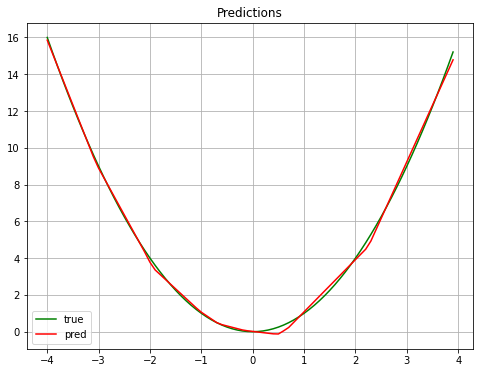

In [7]:
# Visualize results
plt.plot(dataset, y_true, color="g", label="true")
plt.plot(dataset, y_preds, color="r", label="pred")

plt.title("Predictions")
plt.legend()
plt.grid("on")

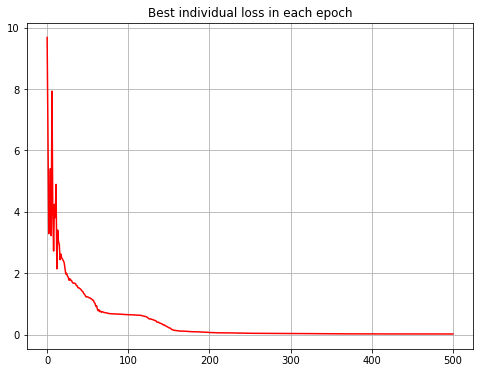

In [8]:
# Visualize loss function
min_losses = [min(losses) for losses in alg_trace.losses_per_epoch]

plt.plot(range(len(alg_trace.losses_per_epoch)), min_losses, color="r")
plt.title("Best individual loss in each epoch")
plt.grid("on")